/mnt/batch/tasks/shared/LS_root/mounts/clusters/student461/code
/mnt/batch/tasks/shared/LS_root/mounts/clusters/student461
=== epoch:21, train acc:0.11333333333333333, test acc:0.1007 ===
train loss:2.282087482930076
train loss:2.2903181297013564
train loss:2.2683623337959262
=== epoch:22, train acc:0.11333333333333333, test acc:0.1032 ===
train loss:2.282639134680356
train loss:2.285364649443104
train loss:2.2760937422699548
=== epoch:23, train acc:0.12666666666666668, test acc:0.1075 ===
train loss:2.2976786342393645
train loss:2.2757441878830105
train loss:2.2783442259109226
=== epoch:24, train acc:0.12, test acc:0.1112 ===
train loss:2.283355590359559
train loss:2.2894027939040376
train loss:2.2748413122185163
=== epoch:25, train acc:0.11666666666666667, test acc:0.1159 ===
train loss:2.28487577606126
train loss:2.2799237863642134
train loss:2.2723091750127553
=== epoch:26, train acc:0.12333333333333334, test acc:0.1171 ===
train loss:2.288153660404453
train loss:2.2841322531832535

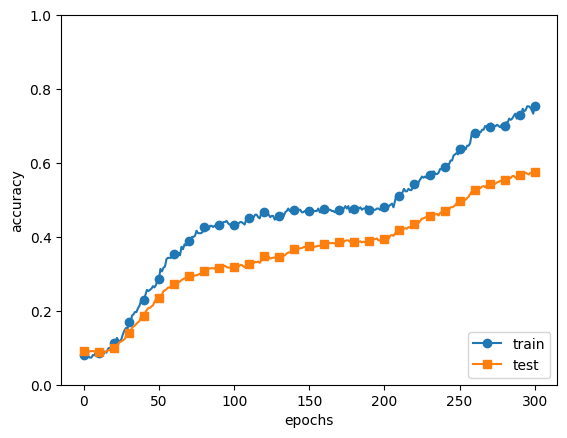

In [5]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

#오버피팅 재현을 위
x_train = x_train[:300]
t_train = t_train[:300]


use_dropout = True #드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2


network = MultiLayerNetExtend(input_size =784 ,hidden_size_list=[100,100,100,100,100,100],
                            output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                    epochs=301, mini_batch_size=100,
                    optimizer='sgd', optimizer_param={'lr':0.01}, verbose=True)

trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

#그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker = 's', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()